<a href="https://colab.research.google.com/github/NimiSarathe/Aibot/blob/main/1_july_Gini_Index_weather_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth =2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


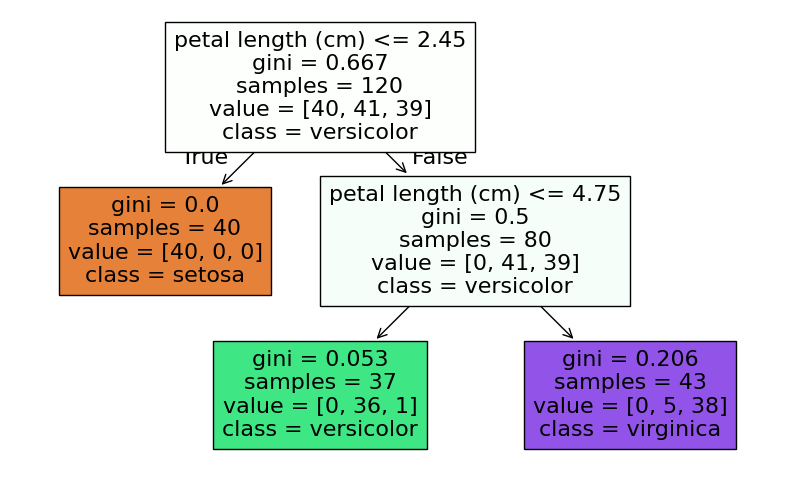

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [ ]:
df = pd.read_csv("/content/weather_classification_data (2).csv")
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [ ]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [ ]:
label_encoders = {}
for column in df.select_dtypes(include="object").columns:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le

In [ ]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


In [ ]:
X1 = df.drop("Weather Type", axis=1)
y1 = df["Weather Type"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(criterion="gini", max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8992424242424243


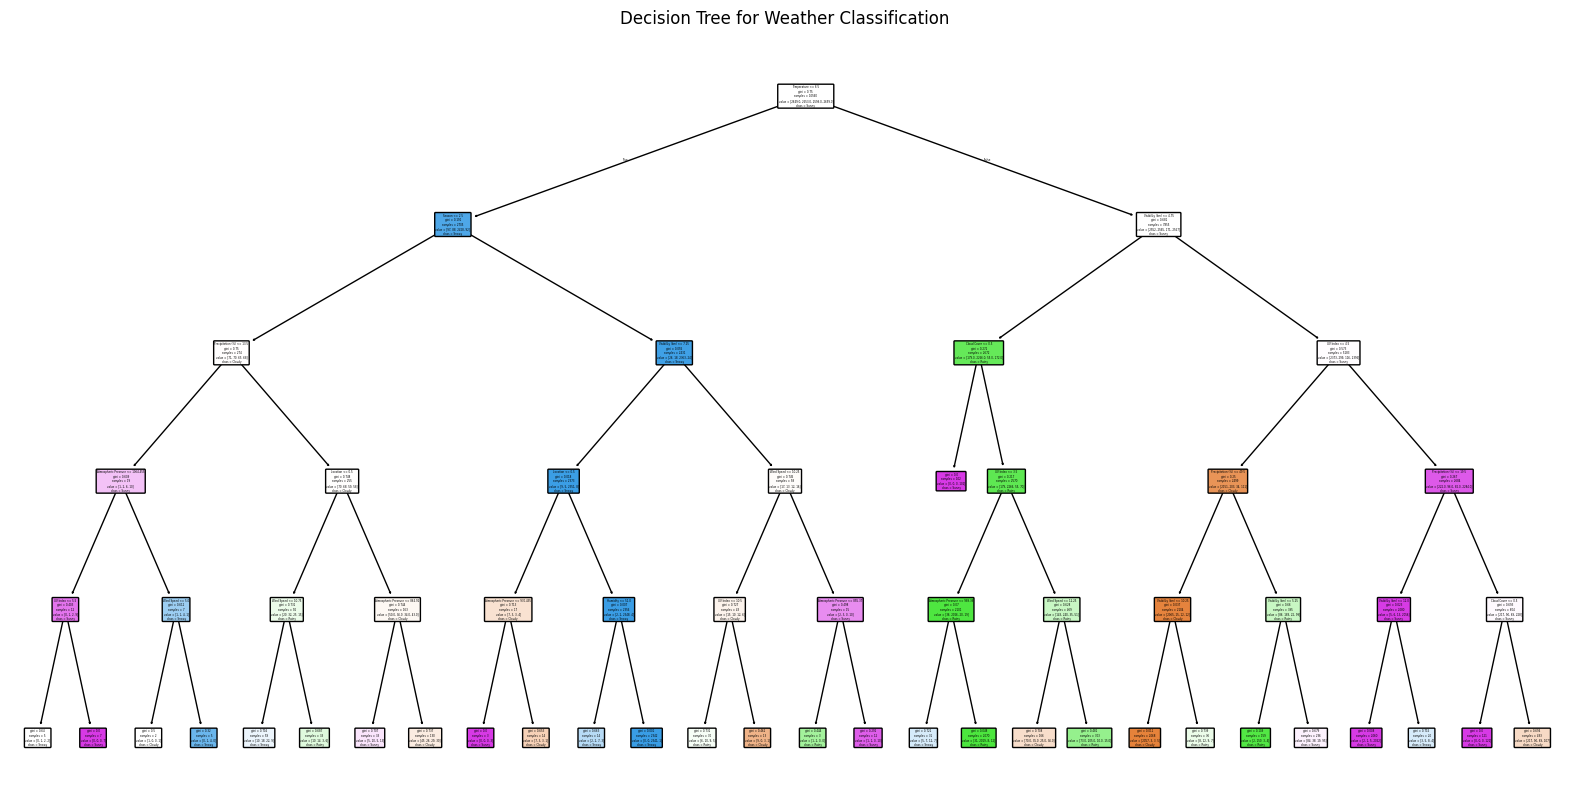

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=X1.columns,
          class_names=label_encoders["Weather Type"].classes_,
          filled=True,
          rounded=True)
plt.title("Decision Tree for Weather Classification")
plt.show()

1)Root Node 2)Growing the tree 3)Pruning the tree 4)checking Impurities a) Entropy b) Gini Index


In [ ]:
# information gain = entropy before - entropy after

In [ ]:
# Happinesss Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder


In [ ]:
DF = pd.read_csv("/content/happydata.csv")
DF

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
...,...,...,...,...,...,...,...
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [ ]:
DF.describe().sum()

,0
infoavail,168.114506
housecost,160.656617
schoolquality,163.258320
policetrust,164.587684
streetquality,164.747024
ëvents,167.065476
happy,147.038732


In [ ]:
DF.isna().sum()

,0
infoavail,0
housecost,0
schoolquality,0
policetrust,0
streetquality,0
ëvents,0
happy,0


In [ ]:
DF.duplicated().sum()

np.int64(18)

In [ ]:
DF.drop_duplicates(inplace=True)

In [ ]:
DF.duplicated().sum()

np.int64(0)

In [ ]:
X = DF[['infoavail', 'housecost', 'schoolquality', 'policetrust', 'streetquality', 'ëvents']]
y = DF['happy']

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
max_depth = 2
clf = DecisionTreeClassifier(max_depth=max_depth)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
("Accuracy:", accuracy)

('Accuracy:', 0.56)

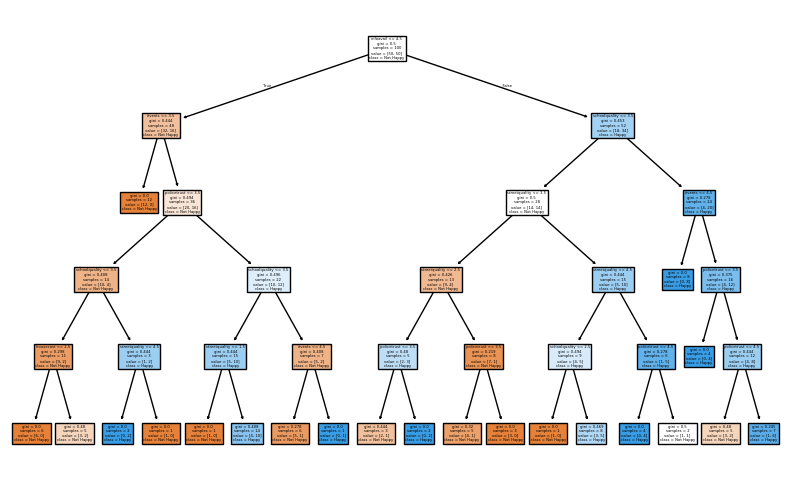

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X.columns, class_names=["Not Happy", "Happy"], filled= True)
plt.show()

In [ ]:
# gender data classification(TREE)


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/gender.csv")
df

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,NaN
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,NaN
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,NaN
...,...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,60000,Orange,NaN
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black,NaN
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green,NaN
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Gender           131 non-null    object 
 1    Age              131 non-null    int64  
 2    Height (cm)      131 non-null    int64  
 3    Weight (kg)      131 non-null    int64  
 4    Occupation       131 non-null    object 
 5    Education Level  131 non-null    object 
 6    Marital Status   131 non-null    object 
 7    Income (USD)     131 non-null    int64  
 8    Favorite Color   131 non-null    object 
 9   Unnamed: 9        0 non-null      float64
dtypes: float64(1), int64(4), object(5)
memory usage: 10.4+ KB


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Height (cm),0
Weight (kg),0
Occupation,0
Education Level,0
Marital Status,0
Income (USD),0
Favorite Color,0
Unnamed: 9,131


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,NaN
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,NaN
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,NaN


In [ ]:
df.drop("Unnamed: 9", axis=1, inplace=True)

In [ ]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [ ]:
label_encoders = {}
for column in df.select_dtypes(include="object").columns:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le

In [ ]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,1,32,175,70,15,3,1,75000,1
1,1,25,182,85,14,1,2,45000,2
2,0,41,160,62,6,2,1,120000,6
3,1,38,178,79,10,1,2,90000,7
4,0,29,165,58,8,0,2,35000,8


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df.columns

Index(['Gender', 'Age', 'Height (cm)', 'Weight (kg)', 'Occupation',
       'Education Level', 'Marital Status', 'Income (USD)', 'Favorite Color'],
      dtype='object')

In [ ]:
X = df.drop('Gender', axis=1)
y = df['Gender']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth = 2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
Accuracy = accuracy_score(y_test, y_pred)
("Accuracy:", Accuracy)

('Accuracy:', 0.9615384615384616)

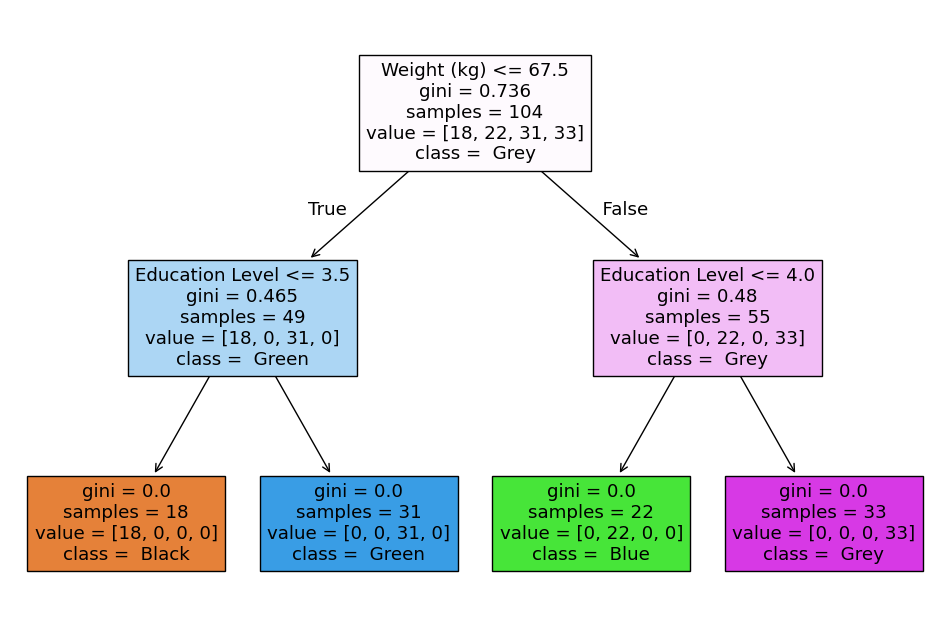

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=le.classes_)
plt.show()

In [ ]:
joblib.dump(model, "gender_classification_model.joblib")


['gender_classification_model.joblib']